In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/Traffic_Accident_2017.csv', encoding = 'euc-kr')

In [5]:
data.head(3)

,발생년,발생년월일시,발생분,주야,요일,사망자수,사상자수,중상자수,경상자수,부상신고자수,...,도로형태_대분류,도로형태,당사자종별_1당_대분류,당사자종별_1당,당사자종별_2당_대분류,당사자종별_2당,발생위치X_UTMK,발생위치Y_UTMK,경도,위도
0,2017,2017010101,15,야간,일,1,2,1,0,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,933501,1700129,126.768634,35.294464
1,2017,2017010102,28,야간,일,1,1,0,0,0,...,교차로,교차로부근,승용차,승용차,보행자,보행자,967570,1944453,127.133107,37.498741
2,2017,2017010102,43,야간,일,1,2,0,1,0,...,단일로,기타단일로,승용차,승용차,승용차,승용차,916497,1842880,126.566631,36.580069


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4065 entries, 0 to 4064
Data columns (total 27 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   발생년           4065 non-null   int64  
 1   발생년월일시        4065 non-null   int64  
 2   발생분           4065 non-null   int64  
 3   주야            4065 non-null   object 
 4   요일            4065 non-null   object 
 5   사망자수          4065 non-null   int64  
 6   사상자수          4065 non-null   int64  
 7   중상자수          4065 non-null   int64  
 8   경상자수          4065 non-null   int64  
 9   부상신고자수        4065 non-null   int64  
 10  발생지시도         4065 non-null   object 
 11  발생지시군구        4065 non-null   object 
 12  사고유형_대분류      4065 non-null   object 
 13  사고유형_중분류      4065 non-null   object 
 14  사고유형          4065 non-null   object 
 15  법규위반_대분류      4065 non-null   object 
 16  법규위반          4065 non-null   object 
 17  도로형태_대분류      4065 non-null   object 
 18  도로형태          4065 non-null 

In [13]:
y = data['요일'].value_counts()

In [16]:
y = y[['월','화','수','목','금','토','일']]
y

월    603
화    608
수    565
목    586
금    603
토    596
일    504
Name: 요일, dtype: int64

In [24]:
from matplotlib import font_manager, rc

In [26]:
rc('font',family='Gulim')

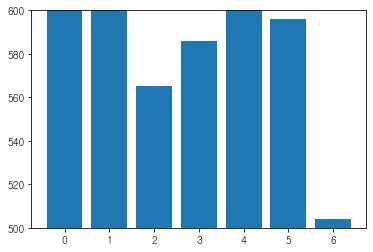

In [28]:
# 데이터를 활용하여 그래프 그리기
x = range(7)
x_label = ['월','화','수','목','금','토','일']
plt.bar(x, y)
plt.ylim(500,600)
plt.show()

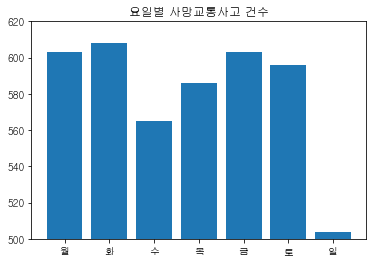

In [29]:
x = range(7)
plt.bar(x, y)

plt.xticks(x, ['월','화','수','목','금','토','일'])
plt.title('요일별 사망교통사고 건수')

plt.ylim(500,620)
plt.show()

In [34]:
car_to_car = data[data['사고유형_대분류'] == '차대차']

In [35]:
car_to_car[['사상자수','발생지시도']]

,사상자수,발생지시도
0,2,전남
2,2,충남
8,3,제주
9,7,충남
17,2,경북
...,...,...
4050,1,경남
4055,6,광주
4058,1,경북
4060,4,경남


In [38]:
# 발생지시도별 총계 구하기
result = car_to_car[['사상자수','발생지시도']].groupby('발생지시도').sum()

In [39]:
result

,사상자수
발생지시도,
강원,214
경기,824
경남,248
경북,287
광주,87
대구,115
대전,61
부산,107
서울,197


In [40]:
y = result.values

In [55]:
x = result.index

In [45]:
y

array([[214],
       [824],
       [248],
       [287],
       [ 87],
       [115],
       [ 61],
       [107],
       [197],
       [ 17],
       [ 73],
       [ 66],
       [298],
       [244],
       [ 50],
       [351],
       [261]], dtype=int64)

In [46]:
x = range(0, len(x))

In [53]:
x

range(0, 17)

In [48]:
# 2차원 배열로 존재하는 y값 1차원 배열로 수정하기 !
list1 = []


for i in range(len(y)):
    list1.append(y[i][0])

In [52]:
y = list1

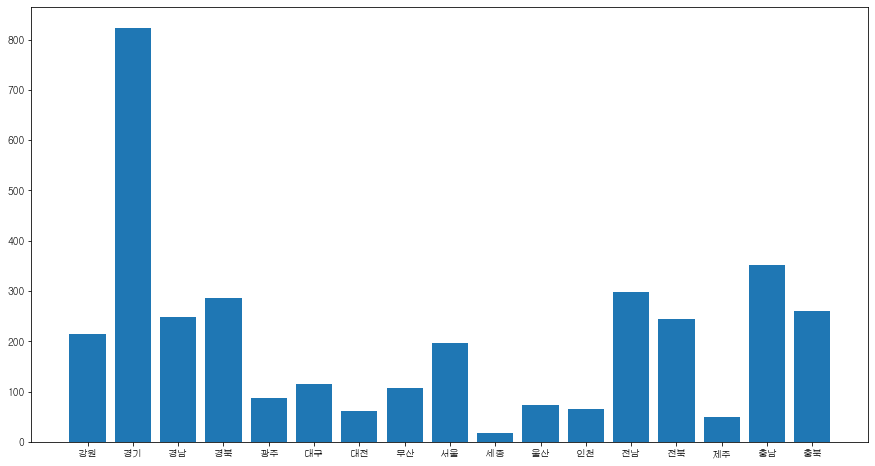

In [58]:
# 그래프의 크기 키우기
plt.figure(figsize = (15, 8))
plt.bar(x, y)
plt.show()

In [ ]:
# 0~2, 3~5, 6~8, 9~11, 12~14, 15~17, 18~20, 21~23


In [60]:
time = data['발생년월일시']

In [63]:
time = time%100

In [64]:
bins = [-1,2,5,8,11,14,17,20,23]
lb = [ '0~2', '3~5', '6~8', '9~11', '12~14', '15~17', '18~20', '21~23']

result = pd.cut(time, bins, labels = lb)
result

0         0~2
1         0~2
2         0~2
3         0~2
4         3~5
        ...  
4060    18~20
4061    18~20
4062    18~20
4063    18~20
4064    21~23
Name: 발생년월일시, Length: 4065, dtype: category
Categories (8, object): ['0~2' < '3~5' < '6~8' < '9~11' < '12~14' < '15~17' < '18~20' < '21~23']

In [69]:
rs = result.value_counts()
rs

18~20    692
15~17    550
9~11     526
21~23    494
12~14    472
6~8      466
3~5      444
0~2      421
Name: 발생년월일시, dtype: int64

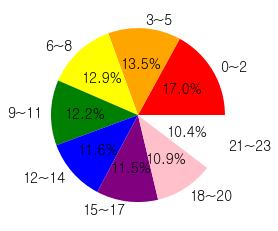

In [81]:
# 파이 차트 그리기
color = ['red','orange','yellow','green','blue','purple','pink','white']

plt.pie(rs, labels = lb, textprops = {'fontsize':14}, autopct = '%1.1f%%', colors = color)
plt.show()